# Required Imports

In [1]:
import csv
from datetime import datetime, timedelta
from time import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
pd.options.display.min_rows = 25

# Import from Database and frameset_n_questions

In [3]:
df = pd.read_excel("PI_Attempts_RAW.xlsx")#, parse_dates=['created_at'])
df = df.sort_values(by=["user_id", "created_at"])

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'], format="%Y-%m-%d %H:%M:%S")

In [5]:
test_students = pd.read_csv("Test_Students.csv",header=None)[0].values.tolist()

In [6]:
df = df.dropna(subset=['user_id']) # Drop Nan user_id
df = df[~df['user_id'].isin([11604, 5018,3063, 54, 58, 8387, 56, 53, 413, 12740, 1096,  2954, 20182,20232, 20166, 19740, 18381, 1270, 6748, 1270, 8387, 90, 16892])]  # Drop ID's we don't want
df = df[~df['user_id'].isin(test_students)] 

In [7]:
df = df[~df['frame_name'].isin(['NFAtoDFAFF','NFAequivFS'])] 


In [8]:
len(df)

223574

In [9]:
# Convert old names to new names
frameset_names = pd.read_csv("Frameset_Questions_Coarse_Grained.csv")
old_names = frameset_names['frame_name'].tolist()
new_names = frameset_names["frame_name_22"].tolist()
name_mapper = dict(zip(old_names, new_names))
df['frame_name'] = df['frame_name'].map(name_mapper)

In [10]:
# Get only up to the date 14-05-21 , after that no records until 23-05-21 where we start Summer'21 and we don't include it here.

spring_21_end = datetime(2021,5,14)
df = df[df['created_at'] <= spring_21_end]

In [11]:
Fall20 = df[df['created_at'].dt.year==2020]

len(Fall20), len(Fall20['user_id'].unique()), len(Fall20['frame_name'].unique())

(70767, 75, 91)

In [12]:
Spring21 = df[df['created_at'].dt.year==2021]
len(Spring21),  len(Spring21['user_id'].unique()),  len(Spring21['frame_name'].unique())

(126216, 70, 87)

In [ ]:

weeks5 = timedelta(weeks=5)


fall_20_up_to_mid1 = datetime(2020,9,28)   
Fall20_mid1 = Fall20[Fall20['created_at'] <= fall_20_up_to_mid1] 

Spring21_mid1 = Spring21[Spring21['created_at'] <= Spring21['created_at'].min()+weeks5]


In [27]:
len(Fall20_mid1), len(Spring21_mid1)

(9866, 34215)

# Some Graphs

In [ ]:
 
def get_student_info(student_id, database):
    df_student = database[database["user_id"] == student_id].drop(columns="user_id", axis=1)
    framesets = set()
    for index, interaction in df_student.iterrows():
        framesets.add(interaction["frame_name"])
    n_interactions = len(df_student)
    n_framesets = len(framesets)
    return n_interactions, n_framesets

In [ ]:
time_all = time()
n_interactions_per_student = []
n_frames_per_student = []
dictt ={}


for student_id in Spring21_mid1['user_id'].unique():
    student_info = get_student_info(student_id, Spring21_mid1)
    
    n_interactions_per_student.append(student_info[0])
    n_frames_per_student.append(student_info[1])
    dictt[student_id] =student_info[0]

        
print("Total Time (in minutes) is {}".format(timedelta(seconds=(time() - time_all))))

Total Time (in minutes) is 0:00:02.277957


In [52]:
Fall20 = sessions[sessions['timestamp'].dt.year==2020]
Spring21 = sessions[sessions['timestamp'].dt.year==2021]
weeks5 = timedelta(weeks=5)



fall_20_up_to_mid1 = datetime(2020,9,28)  # Exactly 5 weeks after the beginning of the semester
Fall20_mid1 = Fall20[Fall20['timestamp'] <= fall_20_up_to_mid1] # There's a problem here in Fall'20, it wasn't store all data starting from 24th August 2020
# So we should stop exactly at September 28, 2020 


# Just add 5 weeks, and we are good. 
Spring21_mid1 = Spring21[Spring21['timestamp'] <= Spring21['timestamp'].min()+weeks5]


In [58]:
n_frames_per_student20 = (
    Fall20_mid1
    .groupby(["user_id"])
    .agg(
        frameset_unique=("curr_frameset_name",  "nunique"),
    )
)['frameset_unique'].tolist()

In [59]:
n_frames_per_student21 = (
    Spring21_mid1
    .groupby(["user_id"])
    .agg(
        frameset_unique=("curr_frameset_name",  "nunique"),
    )
)['frameset_unique'].tolist()

In [60]:
n_frames_per_student22 = (
    sessions_22
    .groupby(["user_id"])
    .agg(
        frameset_unique=("curr_frameset_name",  "nunique"),
    )
)['frameset_unique'].tolist()

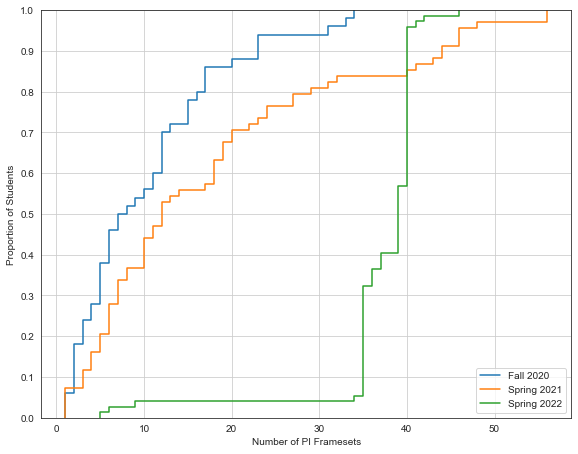

In [61]:
sns.set_style("white")


fig, ax = plt.subplots(figsize=(9.5, 7.5))

gfg = sns.ecdfplot(x = n_frames_per_student20,label="Fall 2020")
gfg = sns.ecdfplot(x = n_frames_per_student21,label="Spring 2021")
gfg = sns.ecdfplot(x = n_frames_per_student22,label="Spring 2022")

gfg.set(
    xlabel="Number of PI Framesets",
    ylabel="Proportion of Students",
    # title="CDF of Framesets Attempted per Student in Fall 2020 (First 5 Weeks)",
    yticks=(np.arange(0,1.1,0.1)),
    # xticks=(range(0, max(n_frames_per_student) +5, 5)),
)
plt.legend(loc='lower right')
plt.grid()  
fig.savefig("cdf_framesets_all.pdf", facecolor="white",dpi=500)

# What is the proportion of the students who finished 80 framesets ?

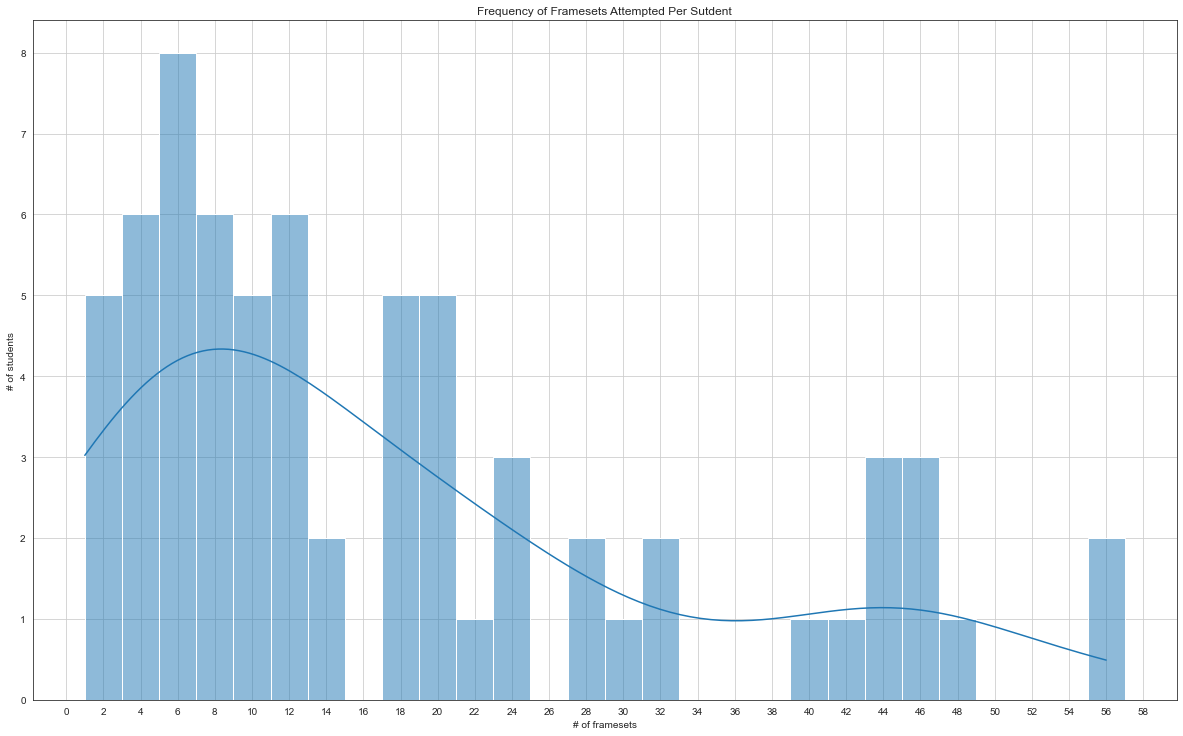

17.602941176470587

In [108]:
fig, ax = plt.subplots(figsize=(20.5, 12.5))

gfg = sns.histplot(data=n_frames_per_student, kde=True, binwidth=2)
gfg.set(
    xlabel="# of framesets",
    ylabel="# of students",
    title="Frequency of Framesets Attempted Per Sutdent",
    xticks=(range(0, max(n_frames_per_student) + 3, 2)),
)
plt.grid()  

plt.show()
# The x-axis is # of framesets attempted, The y-axis is the # of students who attempted the same # of framesets
fig.savefig("Frequency of Framesets Attempted Per Sutdent", facecolor="white")
np.array(n_frames_per_student).mean()

# Converting Raw Data into Events

## Build CSV one event in a row

In [8]:
# Each row will contain one event with [session_number, frame_name, activity, timestamp]
session_counter = 1
session_number = "sesssion 1" 
event_log = [] # GLOBAL variable
activity_counter = 0  # This will be used to count how many interactions in one session, if it's less than 3, then just remove this session by add its number to a list


def convert_raw_to_sessions_and_activity(student_id, database):
    global session_counter
    global session_number
    df_student = database[database["user_id"] == student_id]
    
    curr  =  df_student.iloc[0]
    prev  =  df_student.iloc[0]
    nextt =  df_student.iloc[0]
    
    # Iterate over interactions of this student
    for i in range(0, len(df_student)):
        
        curr = df_student.iloc[i]
        curr_time = curr["created_at"]
        curr_frameset_name = curr["frame_name"]
        curr_question_id = curr["question"]
        
        
        if i != ( len(df_student) - 1) : #Otherwise, we don't have a next, and it will remain the same
            nextt = df_student.iloc[i + 1]
        
        if i != 0:  #Otherwise, we don't have a prev, and it will remain the same
            prev = df_student.iloc[i - 1]

        if (
            curr_frameset_name == prev["frame_name"]
            and curr_question_id < prev["question"]
        ):
            event_log.append([student_id, session_number, curr_frameset_name, "Back", curr_question_id, curr_time - timedelta(seconds=0.1)])

        # Correct
        if curr["correct"]:
            event_log.append([student_id, session_number, curr_frameset_name, "Crrct", curr_question_id, curr_time ])
 
        # InCorrect
        elif not curr["correct"]:
            event_log.append([student_id, session_number, curr_frameset_name, "X", curr_question_id, curr_time ])

        # SESSION ENDED: Either started another frameset given the same user, or has passed more than 15 minutes between two consequence interactions
        # Always after session end, there's a new session for whoever is next
        if (
            nextt["frame_name"] != curr_frameset_name  
            or  ((nextt["created_at"] - curr_time ).total_seconds()/60)>15.0 # Spend some time off - NEW SESSION
            or i == len(df_student) - 1 # means the last session, so his/her last session in that semester
        ):
            
            event_log.append([student_id, session_number, curr_frameset_name, "SESSION_END", curr_question_id,  curr_time + timedelta(seconds=0.001) ])
            session_counter += 1 
            session_number = "sesssion " + str(session_counter)

In [9]:
 
student_ids = df['user_id'].unique()
for student_id in student_ids:
    convert_raw_to_sessions_and_activity(student_id, df)
    
print(len(event_log)) 

207490


In [ ]:
sessions =  pd.DataFrame(event_log, columns= ["user_id","session_number","curr_frameset_name","activity_name","question_id","timestamp",])
sessions.to_excel("Sessions_1D_old_names.xlsx")

In [49]:
sessions= pd.read_excel('Sessions_1D_new_names.xlsx')


In [23]:
sessions_22 =  pd.read_excel("Spring_22/Sessions_1D_22.xlsx")

In [186]:
event_log_Spring21 = event_log

In [24]:
sessions_intereactions_count20_21 = (
    sessions
    .groupby(["session_number"])
    .agg(
        frameset_count=("curr_frameset_name",  "count"),
    )
)['frameset_count'].tolist()

In [25]:
sessions_intereactions_count22 = (
    sessions_22
    .groupby(["session_number"])
    .agg(
        frameset_count=("curr_frameset_name",  "count"),
    )
)['frameset_count'].tolist()

In [36]:
%store -r sessions_intereactions_count22

In [26]:
sessions_interactions_all = sessions_intereactions_count22+ sessions_intereactions_count20_21


In [83]:
temp= pd.DataFrame(sessions_interactions_all, columns=['count'])
len(temp[temp['count'] > 100]), len(temp[temp['count'] <= 100])

(176, 14131)

In [84]:
np.array(sessions_interactions_all).max(),np.array(sessions_interactions_all).mean(), np.median(sessions_interactions_all),  np.array(sessions_interactions_all).min()

(661, 20.477179003285105, 14.0, 2)

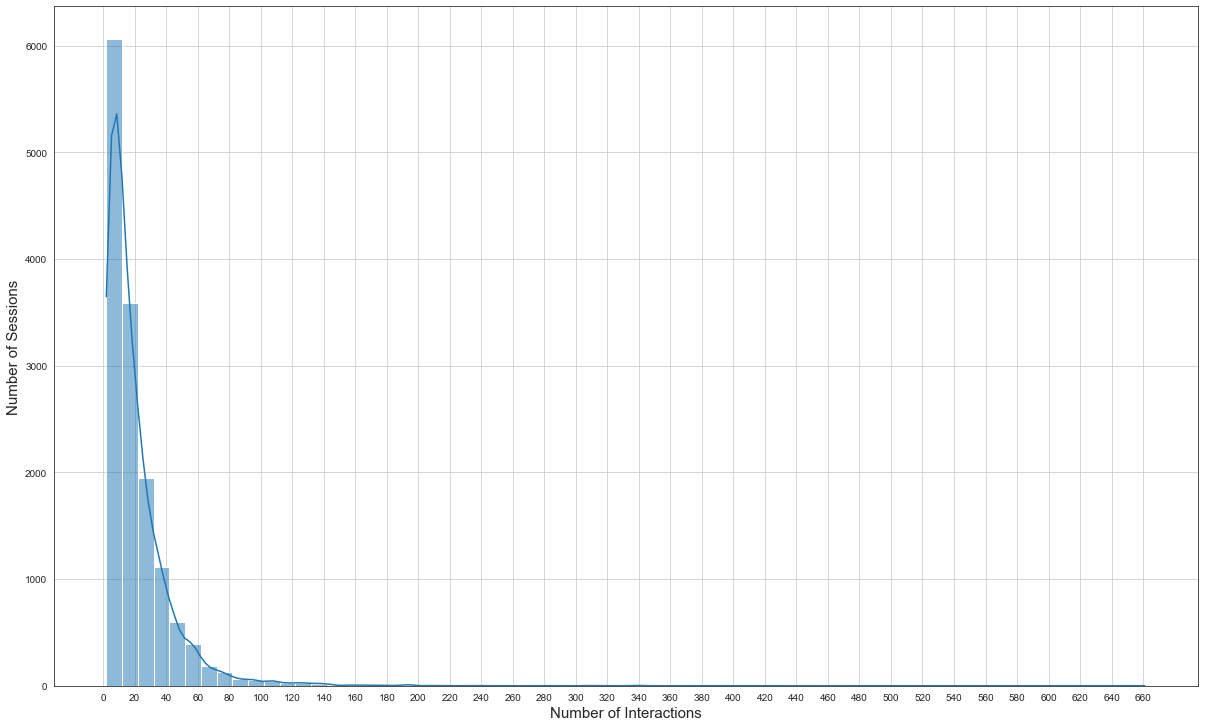

In [27]:
fig, ax = plt.subplots(figsize=(20.5, 12.5))

gfg = sns.histplot(data=sessions_interactions_all, kde=True, binwidth=10)
gfg.set(
    xlabel="Number of Interactions",
    ylabel="Number of Sessions",
    # title="Frequency of Framesets Attempted Per Sutdent",
    xticks=(range(0, max(sessions_interactions_all), 20)),
)
ax. xaxis. label. set_size(15)
ax. yaxis. label. set_size(15)
plt.grid()  

plt.show()
# The x-axis is # of framesets attempted, The y-axis is the # of students who attempted the same # of framesets
fig.savefig("Number of Interactions Per Session.pdf", facecolor="white",dpi=500)


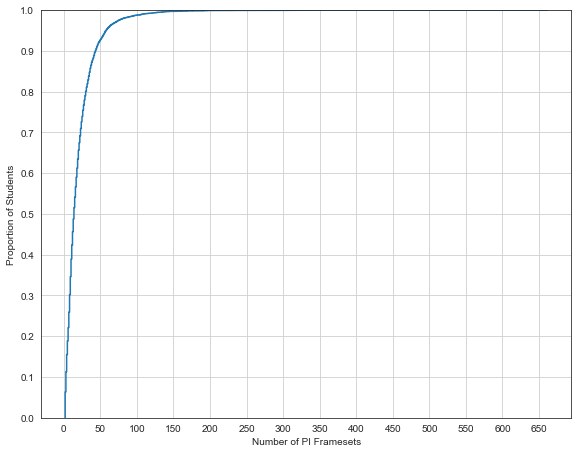

In [93]:
sns.set_style("white")


fig, ax = plt.subplots(figsize=(9.5, 7.5))

gfg = sns.ecdfplot(x = sessions_interactions_all)

gfg.set(
    xlabel="Number of PI Framesets",
    ylabel="Proportion of Students",
    # title="CDF of Framesets Attempted per Student in Fall 2020 (First 5 Weeks)",
    yticks=(np.arange(0,1.1,0.1)),
    xticks=(range(0, max(sessions_interactions_all) +5, 50)),
)
plt.grid()  
fig.savefig("Number of Interactions Per Session", facecolor="white",dpi=500)

# What is the proportion of the students who finished 80 framesets ?

# Sessions_2D.csv

In [ ]:
sessions_one_session_one_row = []
sessions_one_session_one_row_numerical = []
temp = event_log[0][1]
one_row = []
for event in event_log:
    if event[1] != temp:
        sessions_one_session_one_row.append(one_row)

        sessions_one_session_one_row_numerical.append(le.transform(one_row))
        one_row = []
    one_row.append(event[3])
    temp = event[1]

# convert the ragged lists into numpy
sessions_one_session_one_row_numerical = np.asarray(sessions_one_session_one_row_numerical)

In [ ]:
sessions_transposed = list(
    map(list, zip_longest(*sessions_one_session_one_row, fillvalue=None))
)

# write list of lists to CSV
with open("sessions_2D.csv", "w", newline="") as f:
    writer = csv.writer(f)
    for values in zip_longest(*sessions_transposed):
        writer.writerow(values)

In [ ]:
sessions_one_session_one_row_numerical

In [ ]:
lengths = [len(x) for x in sessions_one_session_one_row_numerical]

In [ ]:
fig, ax = plt.subplots()
plt.style.use("default")
sns.ecdfplot(data=lengths, legend=True, label="Real Data", color="orange")
plt.xscale("log")
ax.set_title("How many interactions in each session")
ax.set_xlabel("# of interactions per session")
plt.grid()
plt.show()
fig.savefig("How many interactions per session", dpi=300, facecolor="white")

In [ ]:
np.array(lengths).max()

# Creating Attributes for Summarizing Sessions into one datapoint --> (Clustered_Sessions.csv)

In [9]:
clusters_attributes = [
    "Percentage_incorrects",
    "Percentage_corrects",
    "percent_consecutive_incorrect_interactions",   
    'percent_consecutive_correct_interactions',
    "n_backs",
    "nth_trial_of_frame", #for that user
    "time_between_median" ,
] #[2,3,4,5,6,7,9]

In [401]:
clusters_attributes

['Percentage_incorrects',
 'percent_consecutive_incorrect_interactions',
 'percent_consecutive_correct_interactions',
 'n_backs',
 'nth_trial_of_frame',
 'time_between_median']

In [5]:
def get_n_two_conseuctive_incorrect(activities):
    cnt = 0
    flag = False
    for activity in activities:
        if activity == "X" and flag == False:
            flag = True
        elif activity == "X" and flag == True:
            cnt += 1
        elif activity != "X":
            flag = False
    return cnt

def get_n_two_conseuctive_correct(activities):
    cnt = 0
    flag = False
    for activity in activities:
        if activity == "Crrct" and flag == False:
            flag = True
        elif activity == "Crrct" and flag == True:
            cnt += 1
        elif activity != "Crrct":
            flag = False
    return cnt

def get_n_incorrect(activities):
    cnt = 0
    for activity in activities:
        if activity == "X" :
            cnt+=1
    return cnt


def get_n_correct(activities):
    cnt = 0
    for activity in activities:
        if activity == "Crrct" :
            cnt+=1
    return cnt

In [10]:
clusters_attributes

['Percentage_incorrects',
 'Percentage_corrects',
 'percent_consecutive_incorrect_interactions',
 'percent_consecutive_correct_interactions',
 'n_backs',
 'nth_trial_of_frame',
 'time_between_median']

In [53]:
sessions = pd.read_excel('Sessions_1D_new_names.xlsx')
sessions.columns

Index(['user_id', 'session_number', 'curr_frameset_name', 'activity_name',
       'question_id', 'timestamp'],
      dtype='object')

In [54]:
one_row = []
sessions_attributes = []
sessions_attributes_with_user_frameset = []
attempted_before = {}
n_backs, activity_counter, n_incorrects, n_corrects= 0, 0 , 0 ,0
times_between = []
session_activities = []
question_ids = set()

for interaction in sessions.iterrows():
    interaction = interaction[1]
    activity = interaction['activity_name']
    question_id = interaction['question_id']
    # If the interaction is SESSION_END then add the prev_session number, and move to the next iteration
    if activity == 'SESSION_END' and activity_counter > 2:
      
        # Here we have been adding all interactions of one session to the list activities
        n_consecutive_incorrects = get_n_two_conseuctive_incorrect(session_activities)
        n_consecutive_corrects =   get_n_two_conseuctive_correct(session_activities)
        n_incorrects = get_n_incorrect(session_activities) #becuase some sessions such as {Crrct --> X --> Crrt --> END_SESSION} will has zero value which doesn't represnt anything about the session
        n_corrects = get_n_correct(session_activities)
        percent_consecutive_incorrect_interactions = n_consecutive_incorrects/len(session_activities)
        percent_consecutive_correct_interactions  = n_consecutive_corrects/len(session_activities)
        
        
        if attempted_before.get(str(interaction['user_id']) + "-" + interaction['curr_frameset_name']) == None:
            attempted_before[str(interaction['user_id']) + "-" + interaction['curr_frameset_name']] = 1
        else:  # If the dictionary is not None, it means it have been finished before, and let's count how many times did they finish
            attempted_before[str(interaction['user_id']) + "-" + interaction['curr_frameset_name']]  += 1

        nth_trial_of_frame = attempted_before[str(interaction['user_id']) + "-" + interaction['curr_frameset_name']]
 
        one_row = [n_incorrects/len(session_activities), n_corrects/len(session_activities), round(percent_consecutive_incorrect_interactions,3), round(percent_consecutive_correct_interactions,3), 
                  n_backs , nth_trial_of_frame, np.median(times_between)]
        sessions_attributes.append( one_row )  
        sessions_attributes_with_user_frameset.append([interaction['user_id'], interaction['session_number'], interaction['curr_frameset_name']]+ one_row) 
        
    if activity == 'SESSION_END': # Regardless of the activity_counter
        n_backs = 0
        activity_counter = 0
        start_time = interaction['timestamp']
        times_between = []
        max_question_id = -1
        session_activities = []
        question_ids = set()
        continue # Move directly to the next iteration
    
    
    # add one more activity to that session   
    session_activities.append(activity)
    activity_counter += 1
    
    question_ids.add(question_id)
    
    # If Back
    if activity == "Back":
        n_backs += 1
    
    if activity_counter!=1:
        times_between.append((interaction['timestamp'] - prev_session_time).total_seconds())
    prev_session_time = interaction['timestamp']

In [55]:
sessions_attributes_with_user_frameset = pd.DataFrame(sessions_attributes_with_user_frameset, columns = ['user_id', 'session_number' , 'curr_frameset_name'] + clusters_attributes)

In [56]:
sessions_attributes_with_user_frameset

,user_id,session_number,curr_frameset_name,Percentage_incorrects,Percentage_corrects,percent_consecutive_incorrect_interactions,percent_consecutive_correct_interactions,n_backs,nth_trial_of_frame,time_between_median
0,812,sesssion 2,LanguageFS,0.114286,0.885714,0.000,0.771,0,1,13.5
1,812,sesssion 3,GrammarIntroFS,0.250000,0.750000,0.083,0.500,0,1,7.0
2,812,sesssion 4,GrammarIntroFS,0.210526,0.789474,0.053,0.579,0,2,19.5
3,812,sesssion 5,RelationsFS,0.400000,0.550000,0.200,0.300,1,1,6.0
4,812,sesssion 6,EquivFS,0.333333,0.666667,0.167,0.333,0,1,79.0
5,812,sesssion 7,DFAintroFS,0.839080,0.160920,0.816,0.126,0,1,1.0
6,812,sesssion 8,DFAadvancedFS,0.000000,1.000000,0.000,0.909,0,1,17.5
7,812,sesssion 9,NFAFS,0.533333,0.466667,0.367,0.267,0,1,14.0
8,812,sesssion 10,NFA2DFAlargeExFS,0.000000,1.000000,0.000,0.938,0,1,11.0
9,812,sesssion 11,DFAMinFS,0.277778,0.722222,0.056,0.500,0,1,22.0


# The Clustering Algorithm

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz
from fcmeans import FCM


In [3]:
df = pd.read_csv("Clustered_Sessions_FCM.csv")
df.columns

Index(['cluster', 'user_id', 'session_number', 'curr_frameset_name',
       'Percentage_incorrects', 'Percentage_corrects',
       'percent_consecutive_incorrect_interactions',
       'percent_consecutive_correct_interactions', 'n_backs',
       'nth_trial_of_frame', 'time_between_median'],
      dtype='object')

In [4]:
df.columns
sessions_attributes = df[['Percentage_incorrects',
 'Percentage_corrects',
 'percent_consecutive_incorrect_interactions',
 'percent_consecutive_correct_interactions',
 'n_backs',
 'nth_trial_of_frame',
 'time_between_median']]

In [5]:
sessions_attributes

,Percentage_incorrects,Percentage_corrects,percent_consecutive_incorrect_interactions,percent_consecutive_correct_interactions,n_backs,nth_trial_of_frame,time_between_median
0,0.114286,0.885714,0.000,0.771,0,1,13.5
1,0.250000,0.750000,0.083,0.500,0,1,7.0
2,0.210526,0.789474,0.053,0.579,0,2,19.5
3,0.400000,0.550000,0.200,0.300,1,1,6.0
4,0.333333,0.666667,0.167,0.333,0,1,79.0
5,0.839080,0.160920,0.816,0.126,0,1,1.0
6,0.000000,1.000000,0.000,0.909,0,1,17.5
7,0.533333,0.466667,0.367,0.267,0,1,14.0
8,0.000000,1.000000,0.000,0.938,0,1,11.0
9,0.277778,0.722222,0.056,0.500,0,1,22.0


In [6]:
traces_attributes = np.asarray(sessions_attributes)
traces_attributes_standardized = StandardScaler().fit_transform(traces_attributes)
traces_attributes_centered = StandardScaler(with_std=False).fit_transform(traces_attributes)
traces_attributes_minmax = MinMaxScaler().fit_transform(traces_attributes)

In [7]:
traces_attributes.shape

(8679, 7)

In [ ]:
X_embedded = TSNE(n_components=2, init="pca").fit_transform(sessions_attributes)

C:\Users\Yusuf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Yusuf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [ ]:
pca_model = PCA(n_components=2).fit(traces_attributes_standardized)
X_pca = pca_model.transform(traces_attributes_standardized)
pca_model.explained_variance_ratio_ , sum(pca_model.explained_variance_ratio_) #69.6

In [ ]:
traces_attributes_standardized.shape

In [17]:
clusters_attributes

['Percentage_incorrects',
 'Percentage_corrects',
 'percent_consecutive_incorrect_interactions',
 'percent_consecutive_correct_interactions',
 'n_backs',
 'nth_trial_of_frame',
 'time_between_median']

## Fuzzy C-Means

In [18]:
fpcs = []
silhouettes = []
for i in range(2,13):
    ncenters = i
    alldata = X_pca
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            alldata.T, ncenters , 2, error=0.005, maxiter=1000, init=None)
    fcm_labels = np.argmax(u, axis=0)
    sil = silhouette_score(X_pca, fcm_labels)
    silhouettes.append(sil)
    fpcs.append(fpc)
    print(i, fpc, sil)

2 0.7910937993093714 0.4953626302268273
3 0.7001797649607631 0.4177935356764132
4 0.6678649062390584 0.46673025208409386
5 0.6342557361384776 0.4232903698677014
6 0.6074590391645487 0.39519876196619674
7 0.587006794684324 0.37764913346438106
8 0.5692123914270371 0.3584934247130146
9 0.5754731024080489 0.40528420691850187
10 0.569970835580709 0.3837669600664287
11 0.5687213199089101 0.40369792410851857
12 0.5595897134135305 0.3766812153112008


In [17]:
ncenters = 2
alldata = X_pca
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata.T, ncenters , 2, error=0.005, maxiter=1000, init=None)
fcm_labels = np.argmax(u, axis=0)
sil = silhouette_score(X_pca, fcm_labels)
sil, fpc
# (0.4953626302268621, 0.7910909886058047)

(0.4953626302268273, 0.7910914825037535)

C:\Users\Yusuf\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


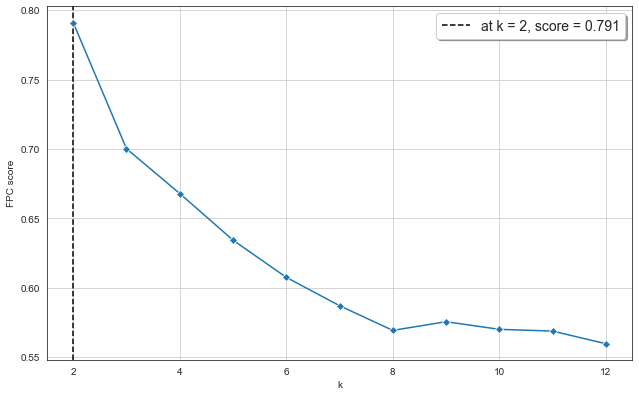

In [19]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10.5, 6.5))
plt.axvline(2, 0,1, linestyle='dashed', color='black',label='at k = 2, score = 0.791')

gfg = sns.lineplot(
    range(2,13) , fpcs, markers=True, dashes=False, marker='D'
)
 


gfg.set(
    xlabel="k",
    ylabel="FPC score",
    # title="Fuzzy Power Control (FPC) Score for Fuzzy C-Means Clustering",
    # yticks=(np.arange(0,1.1,0.1)),
    # xticks=(np.arange(min(fpcs), max(fpcs), 0.05)),
)
plt.legend(loc='upper right',  frameon=True,  shadow=True,prop={'size': 14})
plt.grid()  
fig.savefig("FPC_first_two.pdf", facecolor="white",dpi=500,)

C:\Users\Yusuf\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


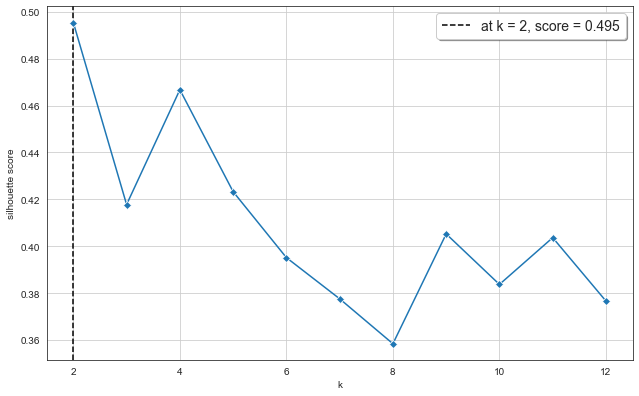

In [20]:
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10.5, 6.5))
plt.axvline(2, 0,1, linestyle='dashed', color='black',label='at k = 2, score = 0.495')

gfg = sns.lineplot(
    range(2,13) , silhouettes, markers=True, dashes=False, marker='D'
)
 


gfg.set(
    xlabel="k",
    ylabel="silhouette score",
    # title="Silhouette Score for Fuzzy C-Means Clustering",
    # yticks=(np.arange(0,1.1,0.1)),
    # xticks=(np.arange(min(fpcs), max(fpcs), 0.05)),
)
plt.legend(loc='upper right',  frameon=True,  shadow=True,prop={'size': 14})
plt.grid()  
fig.savefig("silhouette_first_two.pdf", facecolor="white",dpi=500,)

In [61]:
ncenters =2
alldata = X_pca
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata.T, ncenters , 2, error=0.005, maxiter=1000, init=None)
fpc

0.7910916432429076

In [48]:
d

array([[2.46649041, 2.38684717, 1.35487414, ..., 3.15725075, 0.46318765,
        0.49282525],
       [1.0438028 , 1.49097152, 2.004703  , ..., 0.78727684, 3.29963834,
        3.64062467]])

In [67]:
import sklearn
dist = sklearn.metrics.pairwise_distances(X_pca)

In [45]:
np.save('centers', cntr)

In [39]:
u, u0, d, jm, p, fpc= fuzz.cmeans_predict(X_pca.T, cntr, 2, error=0.005, maxiter=1000, init=None)

In [40]:
fpc

0.797092577466105

In [42]:
fcm_labels = np.argmax(u, axis=0)
ones = np.sum(fcm_labels) # 1 is normal
zeros = len(fcm_labels) - ones # 0 is credit-seeking
'1:', ones, '0:', zeros, silhouette_score(X_pca, fcm_labels)

('1:', 1373, '0:', 2637, 0.5115868549946267)

In [440]:
fcm_labels = ["Credit Seeking" if x == 0 else "Normal" for x in fcm_labels]

In [441]:
Clustered_Sessions_FCM = pd.DataFrame(np.concatenate((np.expand_dims(fcm_labels, axis=1), sessions_attributes_with_user_frameset, ), 1,), 
                                  columns = ['cluster', 'user_id', 'session_number' , 'curr_frameset_name'] + clusters_attributes)

In [442]:
Clustered_Sessions_FCM.to_csv("Clustered_Sessions_FCM.csv",  index=False)

NameError: name 'X_embedded' is not defined

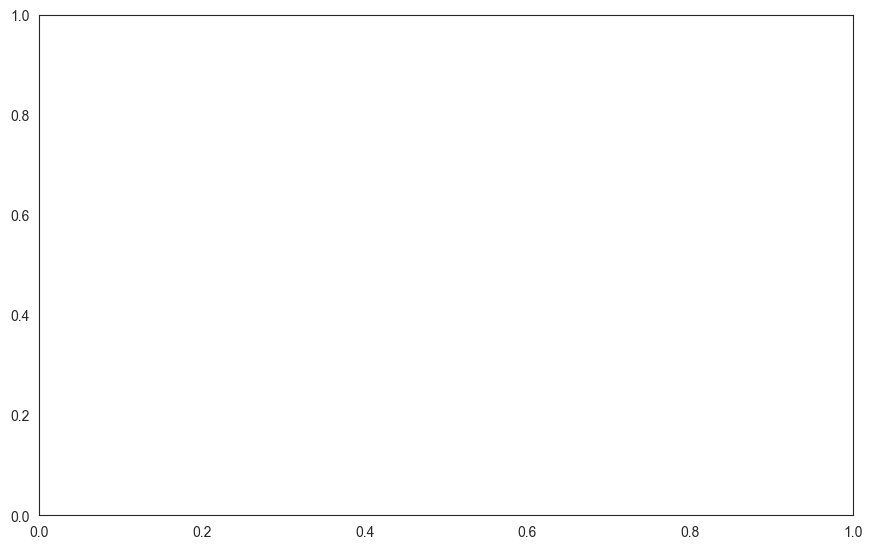

In [43]:
fig, ax = plt.subplots(figsize=(10.5, 6.5))
ax = sns.scatterplot(
    x=X_embedded[:, 0], y=X_embedded[:, 1], hue=u.T[:,1], s=25, palette="viridis", alpha=.5
)


# Analyze Which Framesets attract Credit-Seeking

In [ ]:
clusters_df = pd.read_csv("Clustered_Sessions.csv")
framesets_info_df = pd.read_csv(
    "Framesets_Info.csv"
)  ## We need to create a file that has information about each frameset, and how many times had been considered credit seeking

framesets_info_df.set_index("FramesetName")
# frames_clustered --> The distinct n_users credit seeking for this frameset + sessions_count is the number of attempts (maybe many attempts for one user)

temp_df = (
    clusters_df[clusters_df["Cluster"] == "Credit Seeking"]
    .groupby(["FramesetName"], as_index=False)
    .agg(
        Users_count_CrSK=("UserID", pd.Series.nunique),
        Sessions_count_CrSk=("UserID", "count"),
    )
)

framesets_info_df = framesets_info_df.merge(temp_df, left_on="FramesetName", right_on="FramesetName", how='outer')
# frames_clustered --> The distinct n_users normal behavior for this frameset + sessions_count is the number of attempts (maybe many attempts for one user)

temp_df = (
    clusters_df[clusters_df["Cluster"] == "Normal"]
    .groupby(["FramesetName"], as_index=False)
    .agg(
        Users_count_Nrml=("UserID", pd.Series.nunique),
        Sessions_count_Nrml=("UserID", "count"),
    )
)
framesets_info_df = framesets_info_df.merge(temp_df, left_on="FramesetName", right_on="FramesetName", how='outer')


In [ ]:
len(clusters_df['UserID'].unique())

In [ ]:
framesets_info_df['Comments']= framesets_info_df['Comments'].fillna('')
framesets_info_df['Users_count_CrSK']= framesets_info_df['Users_count_CrSK'].fillna(0)
framesets_info_df['Sessions_count_CrSk']= framesets_info_df['Sessions_count_CrSk'].fillna(0)
framesets_info_df['Users_count_Nrml']= framesets_info_df['Users_count_Nrml'].fillna(0)
framesets_info_df['Sessions_count_Nrml']= framesets_info_df['Sessions_count_Nrml'].fillna(0)

In [ ]:
# The percentage isntead of just raw number of students
# Percentage_Users_Attempted_CrSk --> Out of all users who attempted this frameset, What percentage of them did credit-seeking behavior
# Percentage_Users_Out_of_All_CrSk --> Out of all users in my dataset, What percentage of them did credit-seeking behavior
# Percentage_Sessions_CrSk --> Out of all sessions who attempted this frameset, What percentage of them did credit-seeking behavior
framesets_info_df["Percentage_Users_Attempted_CrSk"] = framesets_info_df['Users_count_CrSK'] /(framesets_info_df['Users_count_CrSK'] + framesets_info_df['Users_count_Nrml'] )
framesets_info_df["Percentage_Users_Attempted_Nrml"] = framesets_info_df['Users_count_Nrml'] /(framesets_info_df['Users_count_CrSK'] + framesets_info_df['Users_count_Nrml'] )
framesets_info_df["Percentage_Users_Out_of_All_CrSk"] = framesets_info_df['Users_count_CrSK'] /len(clusters_df['UserID'].unique())
framesets_info_df["Percentage_Users_Out_of_All_Nrml"] = framesets_info_df['Users_count_Nrml'] /len(clusters_df['UserID'].unique())
framesets_info_df["Percentage_Sessions_CrSk"] = framesets_info_df['Sessions_count_CrSk'] /(framesets_info_df['Sessions_count_CrSk'] + framesets_info_df['Sessions_count_Nrml'] )
framesets_info_df["Percentage_Sessions_Nrml"] = framesets_info_df['Sessions_count_Nrml'] /(framesets_info_df['Sessions_count_CrSk'] + framesets_info_df['Sessions_count_Nrml'] )
# If a student has NA, that means we couldn't divide because the 'frames_clustered_by_CrSK' for this frameset is Empty (i.e., if a frameset is always normal, put 1)
framesets_info_df.to_csv("Framesets_Info.csv")

In [ ]:
framesets_info_df.dropna(inplace=True) # Delete the ones that are in OpenFLA Book but not in OpenDSA Database


In [ ]:
fig, ax = plt.subplots(figsize=(30.5, 12.5))
gfg = sns.barplot(
    data=framesets_info_df.sort_values(
        by="Users_count_CrSK", ascending=False
    ),
    x="FramesetName",
    y="Users_count_CrSK",
)
gfg.set(
    xlabel="Frameset Name",
    ylabel="Count of Students",
    title="Credit Seeking Cases Barplot",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
fig.savefig("Users_count_CrSK", dpi=1000, facecolor="white")

In [ ]:
fig, ax = plt.subplots(figsize=(30.5, 12.5))
gfg = sns.barplot(
    data=framesets_info_df.sort_values(
        by="Percentage_Users_Attempted_CrSk", ascending=False
    ),
    x="FramesetName",
    y="Percentage_Users_Attempted_CrSk",
)
gfg.set(
    xlabel="Frameset Name",
    ylabel="Percentage of Students",
    title="Credit Seeking Cases Barplot",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
fig.savefig("Percentage_Users_Attempted_CrSk", dpi=1000, facecolor="white")

In [ ]:
fig, ax = plt.subplots(figsize=(30.5, 12.5))
gfg = sns.barplot(
    data=framesets_info_df.sort_values(
        by="Percentage_Users_Out_of_All_CrSk", ascending=False
    ),
    x="FramesetName",
    y="Percentage_Users_Out_of_All_CrSk",
)
gfg.set(
    xlabel="Frameset Name",
    ylabel="Percentage of Students",
    title="Credit Seeking Cases Barplot",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
fig.savefig("Percentage_Users_Out_of_All_CrSk", dpi=1000, facecolor="white")

In [ ]:
fig, ax = plt.subplots(figsize=(30.5, 12.5))
gfg = sns.barplot(
    data=framesets_info_df.sort_values(
        by="Users_count_Nrml", ascending=False
    ),
    x="FramesetName",
    y="Users_count_Nrml",
)

gfg.set(
    xlabel="Frameset Name", ylabel="Count of Students", title="Normal Cases Barplot"
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
fig.savefig("Users_count_Nrml", dpi=1000, facecolor="white")

In [ ]:
fig, ax = plt.subplots(figsize=(30.5, 12.5))
gfg = sns.barplot(
    data=framesets_info_df.sort_values(
        by="Percentage_Users_Attempted_Nrml", ascending=False
    ),
    x="FramesetName",
    y="Percentage_Users_Attempted_Nrml",
)

gfg.set(
    xlabel="Frameset Name",
    ylabel="Percentage of Students",
    title="Normal Cases Barplot",
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
fig.savefig("Percentage_Users_Attempted_Nrml", dpi=1000, facecolor='white')

In [ ]:
fig, ax = plt.subplots(figsize=(30.5, 12.5))
gfg = sns.barplot(
    data=framesets_info_df.sort_values(
        by="Percentage_Users_Out_of_All_Nrml", ascending=False
    ),
    x="FramesetName",
    y="Percentage_Users_Out_of_All_Nrml",
)
gfg.set(
    xlabel="Frameset Name",
    ylabel="Percentage of Students",
    title="Credit Seeking Cases Barplot",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
fig.savefig("Percentage_Users_Out_of_All_Nrml", dpi=1000, facecolor="white")

In [ ]:
fig, ax = plt.subplots(figsize=(30.5, 12.5))
gfg = sns.barplot(
    data=framesets_info_df,
    x="FramesetName",
    y="Percentage_Users_Attempted_Nrml",
    color="limegreen",
    label="Normal",
    alpha=0.65,
)

gfg = sns.barplot(
    data=framesets_info_df,
    x="FramesetName",
    y="Percentage_Users_Attempted_CrSk",
    color="red",
    label="Credit Seeking",
    alpha=0.65,
)

gfg.set(
    xlabel="Frameset Name", ylabel="# of Users", title="Normal + Credit Seeking Barplot"
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.legend()
plt.show()
fig.savefig("Normal + Credit Seeking", dpi=1000, facecolor="white")